In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd

all_data={}
for j in [250]:
    my_array=np.zeros((200,200,100))
    data03=pd.read_csv("D:Desktop/SFRT-Topas/vhee/phsp/results/newphys_dosetomedium_water_depthtest_250MV.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
    for i in np.arange(0,len(data03.x)):
        my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]/(1.60218e-19)*0.75e-6/1e6
    all_data[j]=np.array(my_array)



In [3]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)


250MV 57 mm
54.94323510452437 10.505620897884278


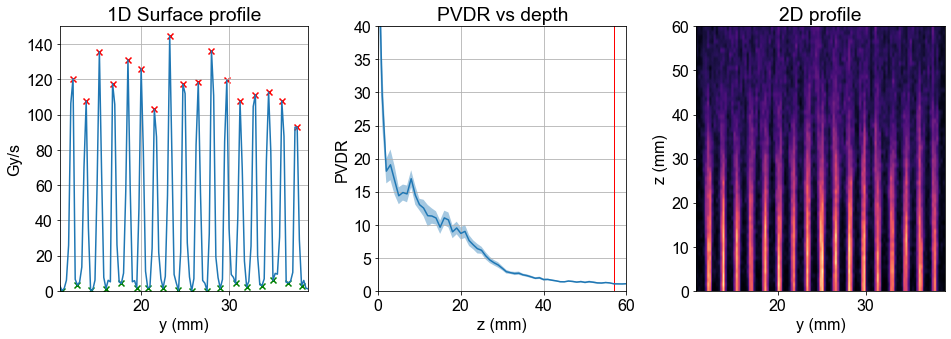

In [4]:
leftedge=43
rightedge=156
xslice=99
maxdose=150
zentry=0

y= np.arange(0,200)*0.25
x= np.arange(0,200)*0.25
z= np.arange(0,100)

DOC_energy=[]
pvdr_energy=[]

for i in [250]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13.5,5))
    im1=ax3.imshow(all_data[i][100].T, aspect='auto',extent=(0,200*0.25,0,100),cmap='magma',origin='lower',vmax=maxdose)
    ax3.set_ylabel('z (mm)')
    ax3.set_xlabel('y (mm)')
    ax3.set_xlim((leftedge*0.25,rightedge*0.25))
    ax3.set_ylim((0,60))
    #fig.colorbar(im1,label='Gy/s')
    ax3.set_title('2D profile')
    
    
    ax1.plot(y,all_data[i][xslice,:,zentry])
    ax1.set_ylim((0,maxdose))
    ax1.set_xlim((leftedge*0.25,rightedge*0.25))
    ax1.set_ylabel('Gy/s')
    ax1.set_xlabel('y (mm)')
    ax1.grid()
    
    
    peaks= find_peaks(all_data[i][xslice,leftedge:rightedge,zentry],height=0.5e8*0.75e-6,distance=4)[0]
    valleys= find_peaks(-all_data[i][xslice,leftedge:rightedge,zentry],distance=4)[0]
    ax1.scatter(y[leftedge+peaks],all_data[i][xslice,leftedge+peaks,zentry],marker='x',c='red')
    ax1.scatter(y[leftedge+valleys],all_data[i][xslice,leftedge+valleys,zentry],marker='x',c='green')
    ax1.set_title('1D Surface profile')

    pvdr_depth=[]
    mean_peaks=[]
    mean_valleys=[]
    peak_error=[]
    valley_error=[]
    pvdr_error=[]
    for j in np.arange(0,100):
        mean_peaks.append(np.mean(all_data[i][xslice,leftedge+peaks,j]))
        mean_valleys.append(np.mean(all_data[i][xslice,leftedge+valleys,j]))
        peak_error.append(np.std(all_data[i][xslice,leftedge+peaks,j])/np.sqrt(len(all_data[i][xslice,leftedge+peaks,j])))
        valley_error.append(np.std(all_data[i][xslice,leftedge+valleys,j])/np.sqrt(len(all_data[i][xslice,leftedge+valleys,j])))
    pvdr_depth=[mean_peaks[k]/mean_valleys[k] for k in np.arange(0,len(mean_valleys))]
    pvdr_error=np.sqrt((np.array(peak_error)/np.array(mean_peaks))**2+(np.array(valley_error)/np.array(mean_valleys))**2)*pvdr_depth
    n=1
    mean_peaks_avg=[sum(mean_peaks[k:k+n])/n for k in range(0,len(mean_peaks),n)]
    mean_valleys_avg=[sum(mean_valleys[k:k+n])/n for k in range(0,len(mean_valleys),n)]
    pvdr_depth_avg=[mean_peaks_avg[k]/mean_valleys_avg[k] for k in np.arange(0,len(mean_valleys_avg))]
    z_avg=[sum(z[k:k+n])/n for k in range(0,len(z),n)]
    ax2.plot(z_avg,pvdr_depth_avg,label=str(i)+'MV',alpha=1)
    ax2.fill_between(z_avg, pvdr_depth-pvdr_error, pvdr_depth+pvdr_error,alpha=0.4)
    ax2.grid()
    ax2.set_ylim((0,41))
    ax2.set_title("PVDR vs depth")
    ax2.set_ylabel('PVDR')
    ax2.set_xlabel('z (mm)')
    DOC= [w*n for w in np.arange(0,len(pvdr_depth_avg)) if np.max(pvdr_depth_avg[w:w+5]-pvdr_error[w:w+5])<=1.1][0]
    print(str(i)+'MV '+str(DOC)+' mm')
    DOC_energy.append(DOC)
    pvdr_energy.append(np.max(pvdr_depth_avg))
    ax2.vlines(DOC,0,100,colors='red',lw=1)
    ax2.set_ylim(0,40)
    ax2.set_xlim(0,60)
    print(pvdr_depth_avg[0],pvdr_error[0])
    fig.tight_layout()
    if i==150:
        peakPDD150=mean_peaks_avg
        


ValueError: x and y must have same first dimension, but have shapes (16,) and (1,)

<Figure size 576x576 with 0 Axes>

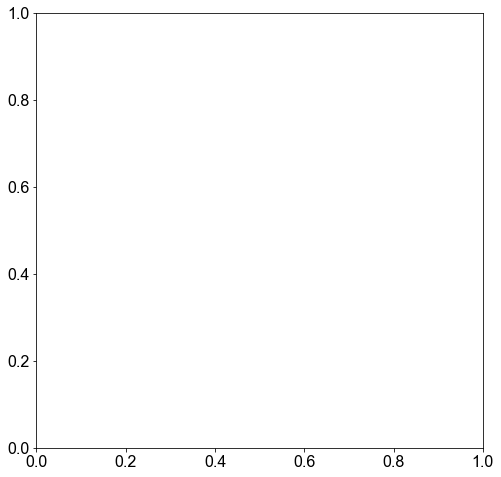

In [5]:
def align_y_axis(ax1, ax2, minresax1, minresax2,numticks):
    """ Sets tick marks of twinx axes to line up with x total tick marks

    ax1 and ax2 are matplotlib axes
    Spacing between tick marks will be a factor of minresax1 and minresax2"""

    ax1ylims = ax1.get_ybound()
    ax2ylims = ax2.get_ybound()
    ax1factor = minresax1 * (numticks-1)
    ax2factor = minresax2 * (numticks-1)
    ax1.set_yticks(np.linspace(ax1ylims[0],
                               ax1ylims[1]+(ax1factor -
                               (ax1ylims[1]-ax1ylims[0]) % ax1factor) %
                               ax1factor,
                               numticks))
    ax2.set_yticks(np.linspace(ax2ylims[0],
                               ax2ylims[1]+(ax2factor -
                               (ax2ylims[1]-ax2ylims[0]) % ax2factor) %
                               ax2factor,
                               numticks))

energy=np.arange(100,250+1,10)


figure(1,figsize=(8,8))
fig, ax1=plt.subplots(figsize=(8,8))
plt.plot(np.arange(100,250+1,10),DOC_energy,marker='o',label='Depth of convergence',markersize=9,c='tab:orange')
plt.ylabel('Depth of convergence (mm)',c='tab:orange')
plt.xlabel('Energy (MeV)')
plt.grid(c='lightgray',axis='both',ls='--')
plt.ylim(bottom=0)
ax2=ax1.twinx()
#plt.plot(np.arange(100,250,10),pvdr_energy,marker='o',markersize=9,label='PVDR')
#plt.ylabel('PVDR',c='tab:blue')
plt.grid(c='lightgray',axis='both',ls='--')
plt.ylim(bottom=0)
fig.legend(loc="upper center", bbox_to_anchor=(0.5,0.8455))
plt.title('Depth test results (water)')

align_y_axis(ax1,ax2,5,5,6)

1.1219667310398542


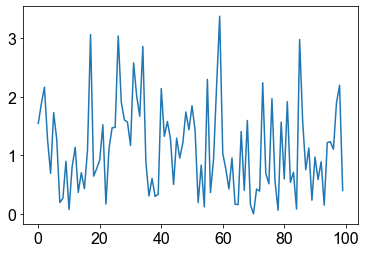

In [17]:
#paper_meanpeaks=np.load("d:Desktop/SFRT-Topas/vhee/vhee_patient/depth_test/meanpeaks_250.npy")
#paper_meanvalleys=np.load("d:Desktop/SFRT-Topas/vhee/vhee_patient/depth_test/meanvalleys_250.npy")
area2=np.load("d:Desktop/SFRT-Topas/vhee/vhee_patient/depth_test/area_250.npy")
figure(1)
area=[]
for i in np.arange(0,100):
    area.append(np.mean(all_data[250][80:100,80:100,i]))
plt.plot(z,np.abs((area-area2)/area*100))
print(np.mean(np.abs((area-area2)/area*100)))